<a href="https://colab.research.google.com/github/Yomunozs/Senales_Sistemas/blob/main/Ejercicio_tarea_trigonometrica_de_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Encontrar la representación por serie exponencial de Fourier de la señal $x(t) = {\rm{rect}}_{\tau/2}(t)$, con $t\in [-\tau/2,\tau/2]$.


Se toma el codigo presentado en el cuaderno 1 de la carpeta 3 del github de señales y sistemas, y se adapta teniendo en cuenta la nueva señal y su representacion apartir de la serie trigonometrica de fourier

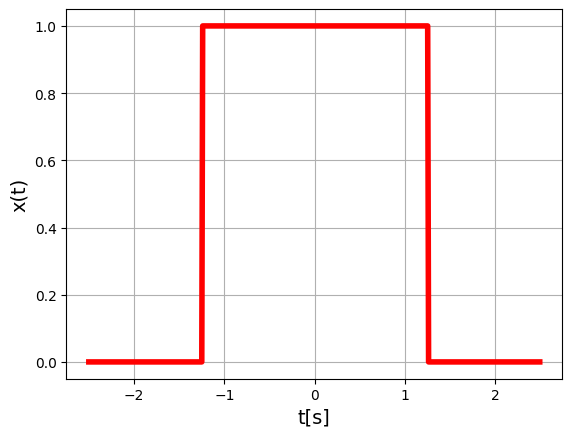

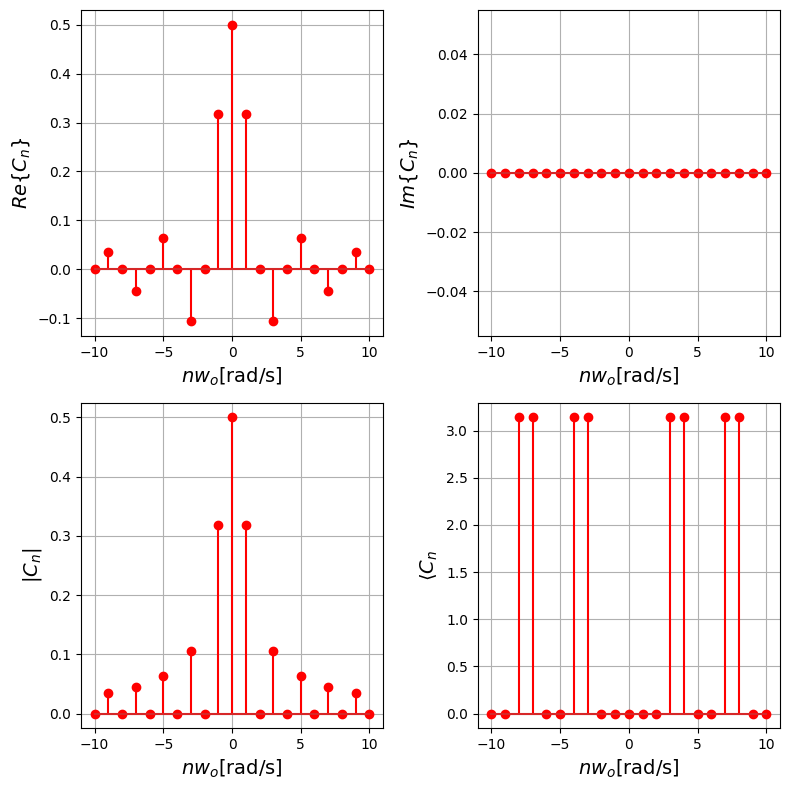

In [81]:
# Se defne la funcion x(t)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
import sympy as sym
warnings.filterwarnings("ignore")

t, tau = sym.symbols('t tau', real=True)#variables simbólicas
A = 1 # amplitud de la señal
T = 5 # segundos de gráfica
Fs = 100 # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas

# Parámetros de la señal
A = 1  # Amplitud
tau = T/2  # Duración de la señal rectangular en segundos
#Nm = 1000  # Número de muestras

# Definir la función rectangular
def rect(t, tau):
    return np.where(np.abs(t) <= tau / 2, 1, 0)

#Generar la señal rectangular usando la función rectangular definida
xo = A * rect(tv, tau)

#graficar señal original

plt.plot(tv,xo,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

#De los calculos se obtien la funcion de reconstrucción

N = 10 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental

# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (1/(nv*np.pi)*np.sin(nv*np.pi/2))# pesitos atravez de serie trigonometrica de fourier
Cn[N] = 1/2 # nivel dc C_0
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()


In [82]:
Px = A**2 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,xo,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>